# ⛴️ Winds in Chesapeake Bay

> Demonstrates the following:
> 
> - Pivoting DataFrame from long form to wide form
> - Compute rolling averages
> - Dealing with wind vectors

In [1]:
from datetime import datetime

import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns
from herbie.toolbox import EasyMap

import synoptic

/home/blaylock/miniconda3/envs/synoptic2/lib/python3.12/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
df = synoptic.TimeSeries(
    start=datetime(2017, 8, 1),
    end=datetime(2017, 8, 4),
    vars=["wind_speed", "wind_direction", "wind_gust"],
    stid=["YKRV2", "44072", "WDSV2", "CBBV2"],
).df()
df

🚚💨 Speedy delivery from Synoptic timeseries service.
📦 Received data from 4 stations.


date_time,variable,sensor_index,is_derived,value,units,id,stid,name,elevation,latitude,longitude,mnet_id,state,timezone,elev_dem,period_of_record_start,period_of_record_end,is_restricted,is_active
"datetime[μs, UTC]",str,u32,bool,f64,str,u32,str,str,f64,f64,f64,u32,str,str,f64,"datetime[μs, UTC]","datetime[μs, UTC]",bool,bool
2017-08-01 00:00:00 UTC,"""wind_gust""",1,false,4.02,"""m/s""",23426,"""YKRV2""","""York River East Rear Range Lig…",0.0,37.25,-76.3333,121,"""VA""","""America/New_York""",0.0,2016-12-14 16:49:00 UTC,2023-08-16 12:54:00 UTC,false,false
2017-08-01 00:06:00 UTC,"""wind_gust""",1,false,4.47,"""m/s""",23426,"""YKRV2""","""York River East Rear Range Lig…",0.0,37.25,-76.3333,121,"""VA""","""America/New_York""",0.0,2016-12-14 16:49:00 UTC,2023-08-16 12:54:00 UTC,false,false
2017-08-01 00:12:00 UTC,"""wind_gust""",1,false,3.58,"""m/s""",23426,"""YKRV2""","""York River East Rear Range Lig…",0.0,37.25,-76.3333,121,"""VA""","""America/New_York""",0.0,2016-12-14 16:49:00 UTC,2023-08-16 12:54:00 UTC,false,false
2017-08-01 00:18:00 UTC,"""wind_gust""",1,false,4.47,"""m/s""",23426,"""YKRV2""","""York River East Rear Range Lig…",0.0,37.25,-76.3333,121,"""VA""","""America/New_York""",0.0,2016-12-14 16:49:00 UTC,2023-08-16 12:54:00 UTC,false,false
2017-08-01 00:24:00 UTC,"""wind_gust""",1,false,4.47,"""m/s""",23426,"""YKRV2""","""York River East Rear Range Lig…",0.0,37.25,-76.3333,121,"""VA""","""America/New_York""",0.0,2016-12-14 16:49:00 UTC,2023-08-16 12:54:00 UTC,false,false
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2017-08-03 23:20:00 UTC,"""wind_gust""",1,false,9.99,"""m/s""",60116,"""44072""","""York Spit""",0.0,37.2,-76.3,96,"""VA""","""America/New_York""",0.0,2016-07-22 17:08:00 UTC,2024-11-10 04:54:00 UTC,false,true
2017-08-03 23:30:00 UTC,"""wind_gust""",1,false,8.99,"""m/s""",60116,"""44072""","""York Spit""",0.0,37.2,-76.3,96,"""VA""","""America/New_York""",0.0,2016-07-22 17:08:00 UTC,2024-11-10 04:54:00 UTC,false,true
2017-08-03 23:40:00 UTC,"""wind_gust""",1,false,8.99,"""m/s""",60116,"""44072""","""York Spit""",0.0,37.2,-76.3,96,"""VA""","""America/New_York""",0.0,2016-07-22 17:08:00 UTC,2024-11-10 04:54:00 UTC,false,true


In [3]:
df.select("stid", "latitude", "longitude").unique()

stid,latitude,longitude
str,f64,f64
"""CBBV2""",36.96667,-76.11333
"""WDSV2""",36.9817,-76.3217
"""44072""",37.2,-76.3
"""YKRV2""",37.25,-76.3333


<GeoAxes: xlabel='longitude', ylabel='latitude'>

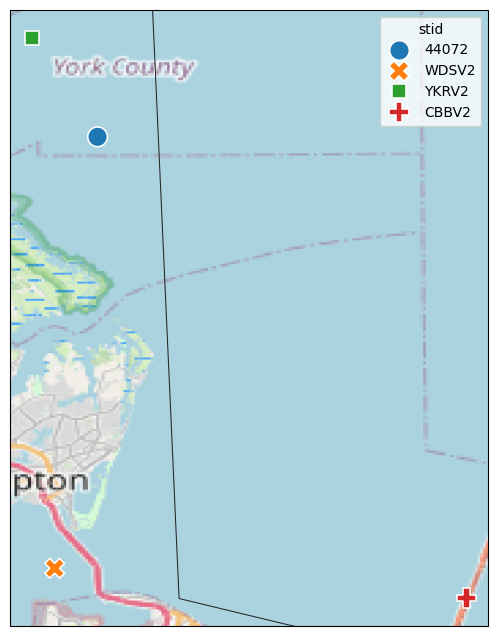

In [4]:
ax = EasyMap(figsize=(8, 8)).OSM(zoom=10).ax

sns.scatterplot(
    df.select("stid", "latitude", "longitude").unique(),
    x="longitude",
    y="latitude",
    style="stid",
    hue="stid",
    s=200,
)

<Axes: xlabel='date_time', ylabel='value'>

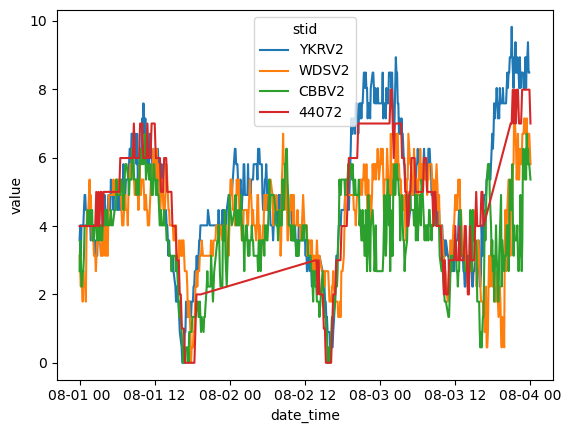

In [5]:
sns.lineplot(
    df.filter(variable="wind_speed"),
    x="date_time",
    y="value",
    hue="stid",
)

<Axes: xlabel='date_time', ylabel='value'>

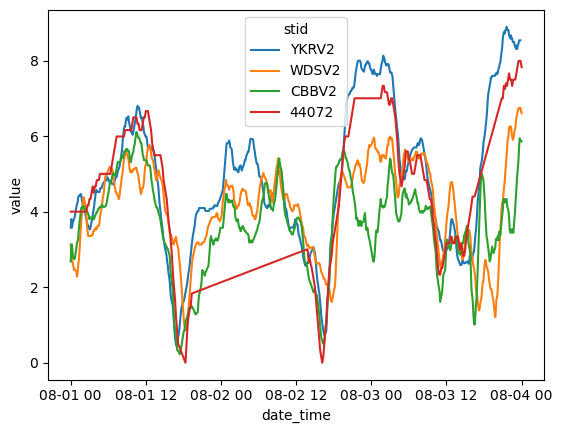

In [6]:
# Compute 60-min average wind speed

df_smoothed = (
    df.filter(variable="wind_speed", sensor_index=1)
    .sort("date_time")
    .rolling("date_time", period="60m", group_by="stid")
    .agg(pl.col("value").mean())
)

sns.lineplot(
    df_smoothed,
    x="date_time",
    y="value",
    hue="stid",
)

## Pivot

Let's focus on one station and pivot the data to get variables in columns

In [7]:
stid = "CBBV2"

a = (
    df.filter(stid=stid)  # Only focus on one station
    .synoptic.pivot()  # Pivot variable values into columns
    .synoptic.with_wind_uv()  # compute u and v wind component
)
a

date_time,stid,latitude,longitude,elevation,wind_direction,wind_speed,wind_gust,wind_u,wind_v
"datetime[μs, UTC]",str,f64,f64,f64,f64,f64,f64,f64,f64
2017-08-01 00:00:00 UTC,"""CBBV2""",36.96667,-76.11333,0.0,139.0,2.68,4.91,-1.758238,2.022622
2017-08-01 00:06:00 UTC,"""CBBV2""",36.96667,-76.11333,0.0,133.0,3.58,4.91,-2.618246,2.441554
2017-08-01 00:12:00 UTC,"""CBBV2""",36.96667,-76.11333,0.0,138.0,3.13,4.47,-2.094379,2.326043
2017-08-01 00:18:00 UTC,"""CBBV2""",36.96667,-76.11333,0.0,140.0,2.23,4.02,-1.433416,1.708279
2017-08-01 00:24:00 UTC,"""CBBV2""",36.96667,-76.11333,0.0,146.0,2.23,3.58,-1.247,1.848754
…,…,…,…,…,…,…,…,…,…
2017-08-03 23:30:00 UTC,"""CBBV2""",36.96667,-76.11333,0.0,166.0,5.81,7.15,-1.405566,5.637418
2017-08-03 23:36:00 UTC,"""CBBV2""",36.96667,-76.11333,0.0,166.0,6.26,7.59,-1.514431,6.074051
2017-08-03 23:42:00 UTC,"""CBBV2""",36.96667,-76.11333,0.0,164.0,5.81,6.7,-1.601453,5.58493


Text(0, 0.5, 'Wind Speed (m/s)')

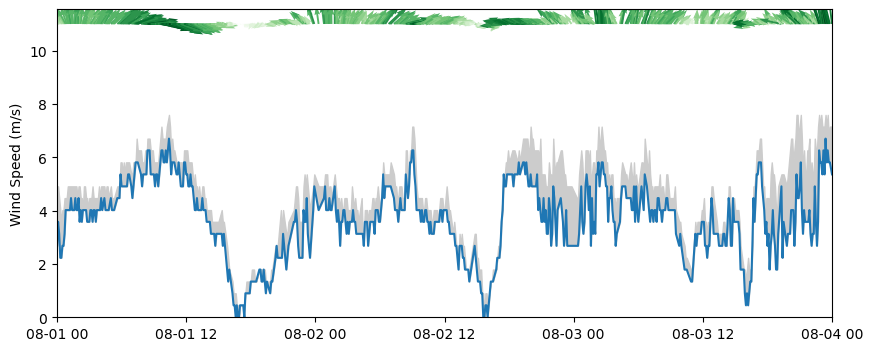

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

ax.fill_between(a["date_time"], a["wind_speed"], a["wind_gust"], color=".8")
ax.plot(a["date_time"], a["wind_speed"], color="tab:blue")

ax.quiver(
    a["date_time"],
    a["wind_speed"] * 0 + 11,
    a["wind_u"],
    a["wind_v"],
    a["wind_speed"],
    cmap="Greens",
)

ax.set_ylim(ymin=0)
ax.set_xlim(a["date_time"].min(), a["date_time"].max())
ax.set_ylabel("Wind Speed (m/s)")

In [12]:
# Rolling
rolling_60m = a.rolling("date_time", period="60m", group_by="stid").agg(
    pl.col("wind_speed", "wind_u", "wind_v").mean(), pl.len()
)
rolling_60m

stid,date_time,wind_speed,wind_u,wind_v,len
str,"datetime[μs, UTC]",f64,f64,f64,u32
"""CBBV2""",2017-08-01 00:00:00 UTC,2.68,-1.758238,2.022622,1
"""CBBV2""",2017-08-01 00:06:00 UTC,3.13,-2.188242,2.232088,2
"""CBBV2""",2017-08-01 00:12:00 UTC,3.13,-2.156954,2.263406,3
"""CBBV2""",2017-08-01 00:18:00 UTC,2.905,-1.97607,2.124625,4
"""CBBV2""",2017-08-01 00:24:00 UTC,2.77,-1.830256,2.06945,5
…,…,…,…,…,…
"""CBBV2""",2017-08-03 23:30:00 UTC,5.363,-1.410243,5.112953,10
"""CBBV2""",2017-08-03 23:36:00 UTC,5.721,-1.375518,5.527575,10
"""CBBV2""",2017-08-03 23:42:00 UTC,5.944,-1.356663,5.776031,10


In [ ]:
# Group_by_dynamic
grouped_60m = a.group_by_dynamic(
    "date_time",
    every="60m",
    group_by="stid",
    include_boundaries=True,
).agg(pl.col("wind_speed", "wind_u", "wind_v").mean(), pl.len())

grouped_60m

stid,_lower_boundary,_upper_boundary,date_time,wind_speed,wind_u,wind_v,len
str,"datetime[μs, UTC]","datetime[μs, UTC]","datetime[μs, UTC]",f64,f64,f64,u32
"""CBBV2""",2017-08-01 00:00:00 UTC,2017-08-01 01:00:00 UTC,2017-08-01 00:00:00 UTC,3.038,-1.724122,2.460743,10
"""CBBV2""",2017-08-01 01:00:00 UTC,2017-08-01 02:00:00 UTC,2017-08-01 01:00:00 UTC,4.11,-0.219624,4.065872,10
"""CBBV2""",2017-08-01 02:00:00 UTC,2017-08-01 03:00:00 UTC,2017-08-01 02:00:00 UTC,3.889,0.945665,3.724923,10
"""CBBV2""",2017-08-01 03:00:00 UTC,2017-08-01 04:00:00 UTC,2017-08-01 03:00:00 UTC,3.888,1.843056,3.403024,10
"""CBBV2""",2017-08-01 04:00:00 UTC,2017-08-01 05:00:00 UTC,2017-08-01 04:00:00 UTC,4.1325,2.376548,3.363512,8
…,…,…,…,…,…,…,…
"""CBBV2""",2017-08-03 20:00:00 UTC,2017-08-03 21:00:00 UTC,2017-08-03 20:00:00 UTC,3.888,-2.652406,2.802274,10
"""CBBV2""",2017-08-03 21:00:00 UTC,2017-08-03 22:00:00 UTC,2017-08-03 21:00:00 UTC,4.023,-2.738462,2.934508,10
"""CBBV2""",2017-08-03 22:00:00 UTC,2017-08-03 23:00:00 UTC,2017-08-03 22:00:00 UTC,3.889,-2.130629,3.161591,10


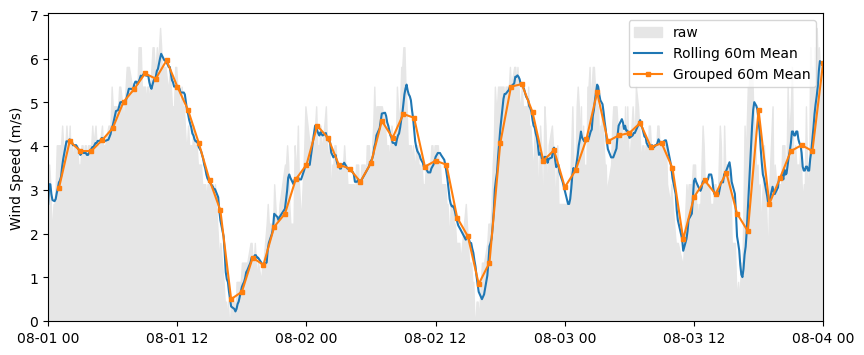

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

ax.fill_between(a["date_time"], a["wind_speed"], color=".9", label="raw")

ax.plot(
    rolling_60m["date_time"],
    rolling_60m["wind_speed"],
    color="tab:blue",
    label="Rolling 60m Mean",
)

# I'm using `_upper_boundary` as the time value which says "at this
# time, the average wind speed for the previous hour was 'x'".
ax.plot(
    grouped_60m["_upper_boundary"],
    grouped_60m["wind_speed"],
    color="tab:orange",
    label="Grouped 60m Mean",
    marker="s",
    markersize=3,
)

ax.set_ylim(ymin=0)
ax.set_xlim(a["date_time"].min(), a["date_time"].max())
ax.set_ylabel("Wind Speed (m/s)")

ax.legend()

[]

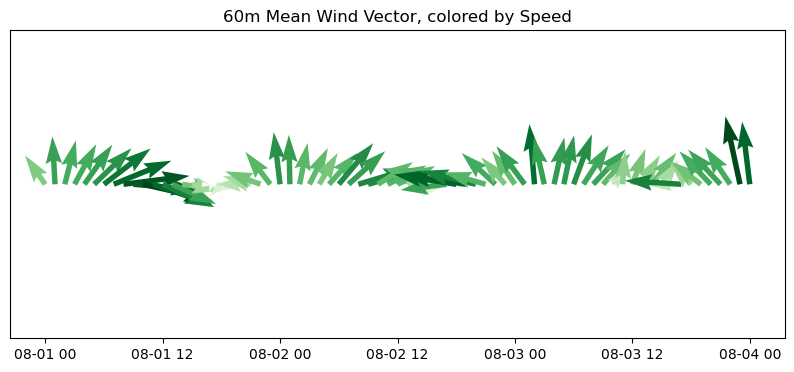

In [47]:
# Plot quiver

fig, ax = plt.subplots(1, 1, figsize=(10, 4))

ax.quiver(
    grouped_60m["date_time"],
    grouped_60m["wind_speed"] * 0,
    grouped_60m["wind_u"],
    grouped_60m["wind_v"],
    grouped_60m["wind_speed"],
    cmap="Greens",
)

ax.set_ylim(-1, 1)
ax.set_title("60m Mean Wind Vector, colored by Speed")

ax.set_yticks([])